## Observations and Insights 

1. The drug regimens which has top two total number of timepoints are Capomulin and Ramicane.

2. The distribution of sex of mice tested is approximately same in both genders. 49.8% of mice tested were female and 50.2% of mice tested were male.

3. Based on the boxplots created for four drug regimens Capomulin, Ramicane, Infubinol and Ceftamin, the mean of final tumor volume of Capomulin and Ramicane are less than the mean of final tumour volume of Infubinol and Ceftamin.

4. Based on the selected mouse (Mouse ID b128), when treated with Capomulin drug regimen, the tumour volume shows an overall downward trend when timepoint is increasing.

5. Based on the Linear Regression model for mouse weight and average tumour volume for Capomulin, the p-value is less than 5% and the correlation coefficient is 0.842. Since the p-value is less than 5% we can conclude that there is a significant evidence to say that there is a linear relationship between mouse weight and average tumour volume because the correlation coefficient is significantly different from zero.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on=["Mouse ID","Mouse ID"])
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of records.
line_count = combined_data["Mouse ID"].count()
print("Number of total records in the combined data set is " + str(line_count) + ".")

# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].unique())
print("Number of mice in the combined data set is " + str(mice_count) + ".")

Number of total records in the combined data set is 1893.
Number of mice in the combined data set is 249.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

group_timepoint = combined_data.groupby(["Mouse ID", "Timepoint"])
duplicate_timepoint = group_timepoint["Timepoint"].count()
df = pd.DataFrame({"Count": duplicate_timepoint})
df2 = df.loc[df["Count"]>=2]
df2

Count
Mouse ID Timepoint       
g989     0              2
         5              2
         10             2
         15             2
         20             2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = combined_data.loc[combined_data["Mouse ID"]=="g989",:]
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"])
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of records in the clean Data Frame.
line_count2 = cleaned_data["Mouse ID"].count()
print("Number of total records in the combined data set is " + str(line_count2) + ".")

# Checking the number of mice in the clean Data Frame.
mice_count2 = len(cleaned_data["Mouse ID"].unique())
print("Number of mice in the combined data set is " + str(mice_count2) + ".")


Number of total records in the combined data set is 1888.
Number of mice in the combined data set is 249.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

tv_mean = cleaned_data.groupby(["Drug Regimen"]).mean()["Tumour Volume (mm3)"]
tv_median = cleaned_data.groupby(["Drug Regimen"]).median()["Tumour Volume (mm3)"]
tv_variance = cleaned_data.groupby(["Drug Regimen"]).var()["Tumour Volume (mm3)"]
tv_std = cleaned_data.groupby(["Drug Regimen"]).std()["Tumour Volume (mm3)"]
tv_sem = cleaned_data.groupby(["Drug Regimen"]).sem()["Tumour Volume (mm3)"]

summary_stat = pd.DataFrame({"Mean of tumour volume": tv_mean,
                             "Median of tumour volume": tv_median,
                             "Variance of tumour volume": tv_variance,
                             "Standard deviation of tumour volume": tv_std,
                             "SEM of tumour volume": tv_sem})

summary_stat


,Mean of tumour volume,Median of tumour volume,Variance of tumour volume,Standard deviation of tumour volume,SEM of tumour volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stat2 =cleaned_data.aggregate({"Tumour Volume (mm3)": ["mean","median","var","std","sem"]})
summary_stat2

,Tumour Volume (mm3)
mean,50.449276
median,48.951421
var,79.291277
std,8.904565
sem,0.204933


## Bar and Pie Charts

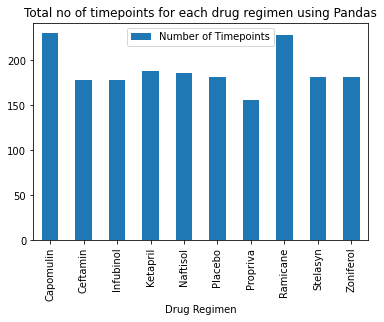

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Timepoint_drug_regimen = cleaned_data.groupby(["Drug Regimen"]).count()["Timepoint"]

drug_regimen_timepoint = pd.DataFrame({"Number of Timepoints": Timepoint_drug_regimen})
                                      
drug_regimen_timepoint.plot(kind="bar", figsize = (6,4))

plt.title("Total no of timepoints for each drug regimen using Pandas")
plt.show()




Text(0, 0.5, 'Number of Timepoints')

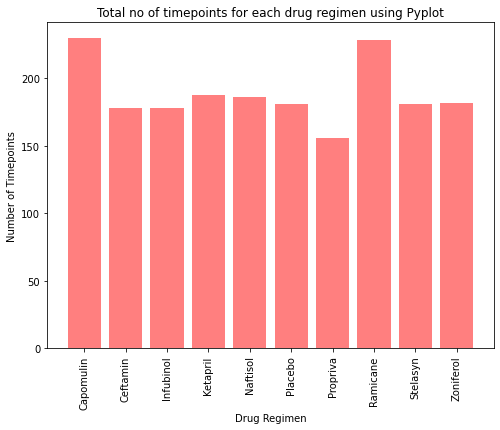

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(Timepoint_drug_regimen))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,6))

plt.bar(x_axis, Timepoint_drug_regimen, color = 'r', alpha = 0.5, align = "center")

plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",\
                            "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

plt.title("Total no of timepoints for each drug regimen using Pyplot")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")


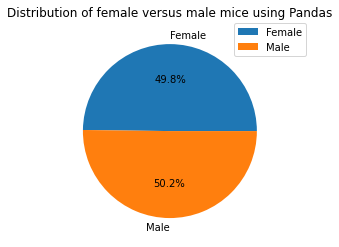

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Mouse_ID_gender = mouse_metadata.groupby(["Sex"]).count()["Mouse ID"]

gender_Mice = pd.DataFrame({"Count": Mouse_ID_gender})

pie1 = gender_Mice.plot(kind="pie", y = "Count", autopct = "%1.1f%%", ylabel = "", \
                        title = "Distribution of female versus male mice using Pandas")
pie1.legend(bbox_to_anchor=(1.15, 1.02), loc="upper right")


plt.show()

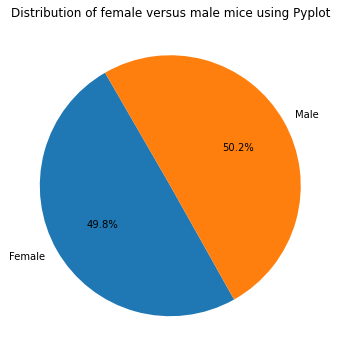

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_labels = ["Female" , "Male"]

count = Mouse_ID_gender

plt.figure(figsize=(8,6))
plt.pie(count, labels=Gender_labels, autopct="%1.1f%%", startangle=120)
plt.title("Distribution of female versus male mice using Pyplot")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

grouped_data = cleaned_data.groupby(["Mouse ID"])
latest_timepoint = grouped_data["Timepoint"].max()
latest_timepoint_per_mouse = pd.DataFrame({"Greatest Timepoint": latest_timepoint})


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
TV_latest_timepoint_per_mouse = latest_timepoint_per_mouse.merge(cleaned_data, \
                                                                 left_on = ["Mouse ID", "Greatest Timepoint"], \
                                                                 right_on = ["Mouse ID", "Timepoint"])
TV_latest_timepoint_per_mouse



,Mouse ID,Greatest Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,45,67.973419,2
1,a251,45,Infubinol,Female,21,25,45,65.525743,1
2,a262,45,Placebo,Female,17,29,45,70.717621,4
3,a275,45,Ceftamin,Female,20,28,45,62.999356,3
4,a366,30,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,10,48.710661,0
245,z578,45,Ramicane,Male,11,16,45,30.638696,0
246,z581,45,Infubinol,Female,24,25,45,62.754451,3
247,z795,45,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)

tumour_vol = []
quartiles = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumour volumes

# add subset 

for t in treatments:
    
    trt = TV_latest_timepoint_per_mouse.loc[TV_latest_timepoint_per_mouse["Drug Regimen"]== t,:].copy()

    trt.sort_values(by = ["Tumour Volume (mm3)"] ,ascending = True, inplace = True)
    
    tumour_vol.append(trt["Tumour Volume (mm3)"])
    
    quart =TV_latest_timepoint_per_mouse.loc[TV_latest_timepoint_per_mouse["Drug Regimen"]== t,\
                                             ["Tumour Volume (mm3)"]].quantile([0.25,0.5,0.75])
    
    quartiles.append(quart["Tumour Volume (mm3)"])


# Determine outliers using upper and lower bounds

lowerq = [x[0.25] for x in quartiles]

upperq = [x[0.75] for x in quartiles]


iqr = []
lower_bound = []
upper_bound = []


for x,y in zip(upperq,lowerq):
    iqr.append(x-y)
    
for x,y in zip(lowerq,iqr):
    lower_bound.append(x-1.5*y)

for x,y in zip(upperq,iqr):
    upper_bound.append(x+1.5*y)  
    

for x in range(0,len(treatments)):
    print(f"Values below {lower_bound[x]} and values above {upper_bound[x]} could be outliers for {treatments[x]}.")


Values below 20.70456164999999 and values above 51.83201549 could be outliers for Capomulin.
Values below 17.912664470000003 and values above 54.30681135 could be outliers for Ramicane.
Values below 36.83290494999999 and values above 82.74144559000001 could be outliers for Infubinol.
Values below 25.355449580000002 and values above 87.66645829999999 could be outliers for Ceftamin.


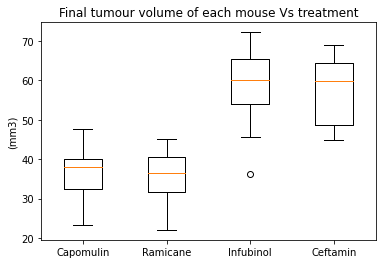

In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

plt.boxplot(tumour_vol, labels = treatments)

plt.title("Final tumour volume of each mouse Vs treatment")

plt.ylabel("(mm3)")

plt.show()

## Line and Scatter Plots

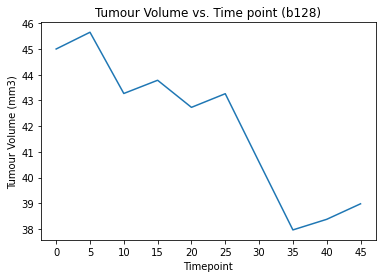

In [16]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
Capomulin_df = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Capomulin",:].copy()
Capomulin_mouse = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="b128"]

plt.plot(Capomulin_mouse["Timepoint"],Capomulin_mouse["Tumour Volume (mm3)"])
plt.title("Tumour Volume vs. Time point (b128)")
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.xticks(Capomulin_mouse["Timepoint"])

plt.show()

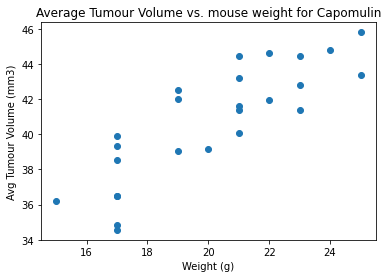

In [17]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

Capomulin_avg_df = Capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(Capomulin_avg_df["Weight (g)"],Capomulin_avg_df["Tumour Volume (mm3)"])
plt.title("Average Tumour Volume vs. mouse weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumour Volume (mm3)")

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

Capomulin_reg = round(st.pearsonr(Capomulin_avg_df["Weight (g)"],Capomulin_avg_df["Tumour Volume (mm3)"])[0],3)
Capomulin_reg_pval = st.pearsonr(Capomulin_avg_df["Weight (g)"],Capomulin_avg_df["Tumour Volume (mm3)"])[1]
print(f"Correlation coefficient for mouse weight and average tumour volume for Capomulin regime is {Capomulin_reg}")
print(f"P-Value of regression model for mouse weight and average tumour volume for Capomulin regime is {Capomulin_reg_pval}")

Correlation coefficient for mouse weight and average tumour volume for Capomulin regime is 0.842
P-Value of regression model for mouse weight and average tumour volume for Capomulin regime is 1.3225722434712388e-07


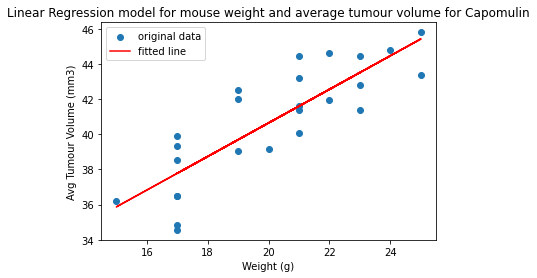

In [19]:
x = Capomulin_avg_df["Weight (g)"]
y = Capomulin_avg_df["Tumour Volume (mm3)"]

res = st.linregress(x, y)

plt.scatter(x, y,label='original data')

plt.plot(x, res.intercept + res.slope*x, 'r-', label='fitted line')
plt.title("Linear Regression model for mouse weight and average tumour volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumour Volume (mm3)")
plt.legend()

plt.show()